### あるお客さんが銀行口座を開設するか

In [1]:
#基礎分析から

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('submit_sample.csv', header=None)

In [4]:
# y の値を予測する

train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [16]:
print(train.shape)
print(test.shape)

(27128, 18)
(18083, 17)


In [6]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [7]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [9]:
# train で y がどれくらいいたか確認
train['y'].value_counts()

0    23954
1     3174
Name: y, dtype: int64

In [10]:
#クロス集計してみる

pd.crosstab(train['marital'], train['y'], margins=True)

y,0,1,All
marital,,,
divorced,2691,364,3055
married,14744,1667,16411
single,6519,1143,7662
All,23954,3174,27128


In [11]:
# ageをビニング

train['age'].describe()

count    27128.000000
mean        40.951010
std         10.608542
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [13]:
age_bining = pd.cut(train['age'], [0,20,30,40,50,60,100])
age_bining

0         (30, 40]
1         (50, 60]
2         (30, 40]
3        (60, 100]
4         (30, 40]
           ...    
27123     (40, 50]
27124     (30, 40]
27125     (30, 40]
27126     (30, 40]
27127     (20, 30]
Name: age, Length: 27128, dtype: category
Categories (6, interval[int64]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [15]:
pd.crosstab(age_bining, train['y'], margins=True)

y,0,1,All
age,,,
"(0, 20]",39,21,60
"(20, 30]",3486,655,4141
"(30, 40]",9488,1111,10599
"(40, 50]",6117,602,6719
"(50, 60]",4416,488,4904
"(60, 100]",408,297,705
All,23954,3174,27128


In [21]:
pout = pd.crosstab(train['poutcome'], train['y'], margins=True)
pout

y,0,1,All
poutcome,,,
failure,2578,391,2969
other,950,173,1123
success,312,574,886
unknown,20114,2036,22150
All,23954,3174,27128


In [28]:
#trainのpoutcome１の割合を新しいカラムに入れる

pout['rate'] = pout[1] / pout['All']

In [29]:
#successの人は講座を開く割合が多い
pout

y,0,1,All,rate
poutcome,,,,
failure,2578,391,2969,0.131694
other,950,173,1123,0.154052
success,312,574,886,0.647856
unknown,20114,2036,22150,0.091919
All,23954,3174,27128,0.117001


In [30]:
train['duration'].describe()

count    27128.000000
mean       260.711295
std        260.091727
min          0.000000
25%        104.000000
50%        182.000000
75%        323.000000
max       4918.000000
Name: duration, dtype: float64

In [32]:
duration_bining = pd.cut(train['duration'], [-1,100,200,300,400,500,600,700,800,900,1000,5000])
duration_bining

0        (900, 1000]
1         (100, 200]
2         (500, 600]
3         (400, 500]
4         (500, 600]
            ...     
27123     (200, 300]
27124     (300, 400]
27125     (400, 500]
27126      (-1, 100]
27127     (100, 200]
Name: duration, Length: 27128, dtype: category
Categories (11, interval[int64]): [(-1, 100] < (100, 200] < (200, 300] < (300, 400] ... (700, 800] < (800, 900] < (900, 1000] < (1000, 5000]]

In [33]:
dura = pd.crosstab(duration_bining, train['y'], margins=True)
dura

y,0,1,All
duration,,,
"(-1, 100]",6379,60,6439
"(100, 200]",7909,450,8359
"(200, 300]",4286,557,4843
"(300, 400]",2258,408,2666
"(400, 500]",1231,308,1539
"(500, 600]",699,270,969
"(600, 700]",441,259,700
"(700, 800]",245,189,434
"(800, 900]",149,153,302


In [34]:
dura['rate'] = dura[1] / dura['All']
dura

y,0,1,All,rate
duration,,,,
"(-1, 100]",6379,60,6439,0.009318
"(100, 200]",7909,450,8359,0.053834
"(200, 300]",4286,557,4843,0.115011
"(300, 400]",2258,408,2666,0.153038
"(400, 500]",1231,308,1539,0.200130
"(500, 600]",699,270,969,0.278638
"(600, 700]",441,259,700,0.370000
"(700, 800]",245,189,434,0.435484
"(800, 900]",149,153,302,0.506623


## 優良顧客を探すために決定木を使う

In [35]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [36]:
#説明変数(ｙ以外全部)　目的変数を取り出す

trainX = train.iloc[:, 0:17]

In [37]:
y = train['y']

In [38]:
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


In [39]:
testX = test.copy()

In [40]:
#ダミー変数化

trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [41]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

In [42]:
clf1.fit(trainX, y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=500)

In [43]:
export_graphviz(clf1, out_file="tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)

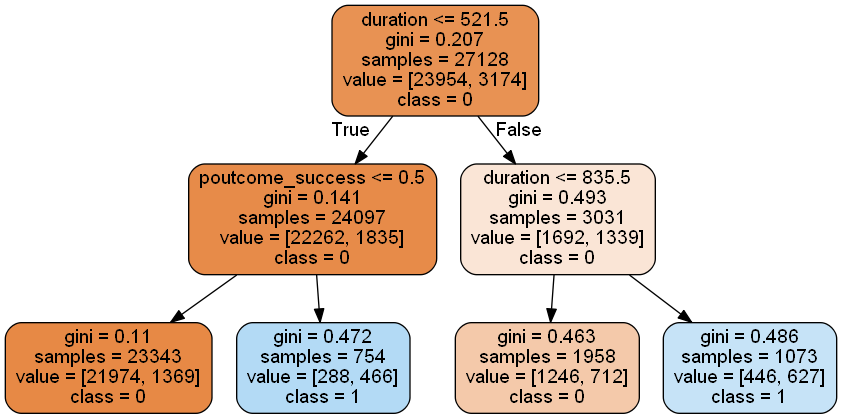

In [44]:
#書き出せたので確認

g = pydotplus.graph_from_dot_file(path="tree.dot")
Image(g.create_png())

In [47]:
#testを予測

pred = clf1.predict_proba(testX)
pred

array([[0.41565704, 0.58434296],
       [0.41565704, 0.58434296],
       [0.94135287, 0.05864713],
       ...,
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713]])

In [51]:
#後半の口座開設した１のデータのみを取りだす

pred = pred[:, 1]

In [52]:
pred

array([0.58434296, 0.58434296, 0.05864713, ..., 0.05864713, 0.05864713,
       0.05864713])

In [53]:
sample[1] = pred

In [54]:
sample.to_csv('./output_csv/submit1_bank.csv', index=None, header=None)

## スコアは0.748だった max_depthの数を増やしてみる

In [55]:
clf2 = DT(max_depth=4, min_samples_leaf=500)

In [56]:
clf2.fit(trainX, y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=500)

In [57]:
export_graphviz(clf2, out_file="tree2.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)

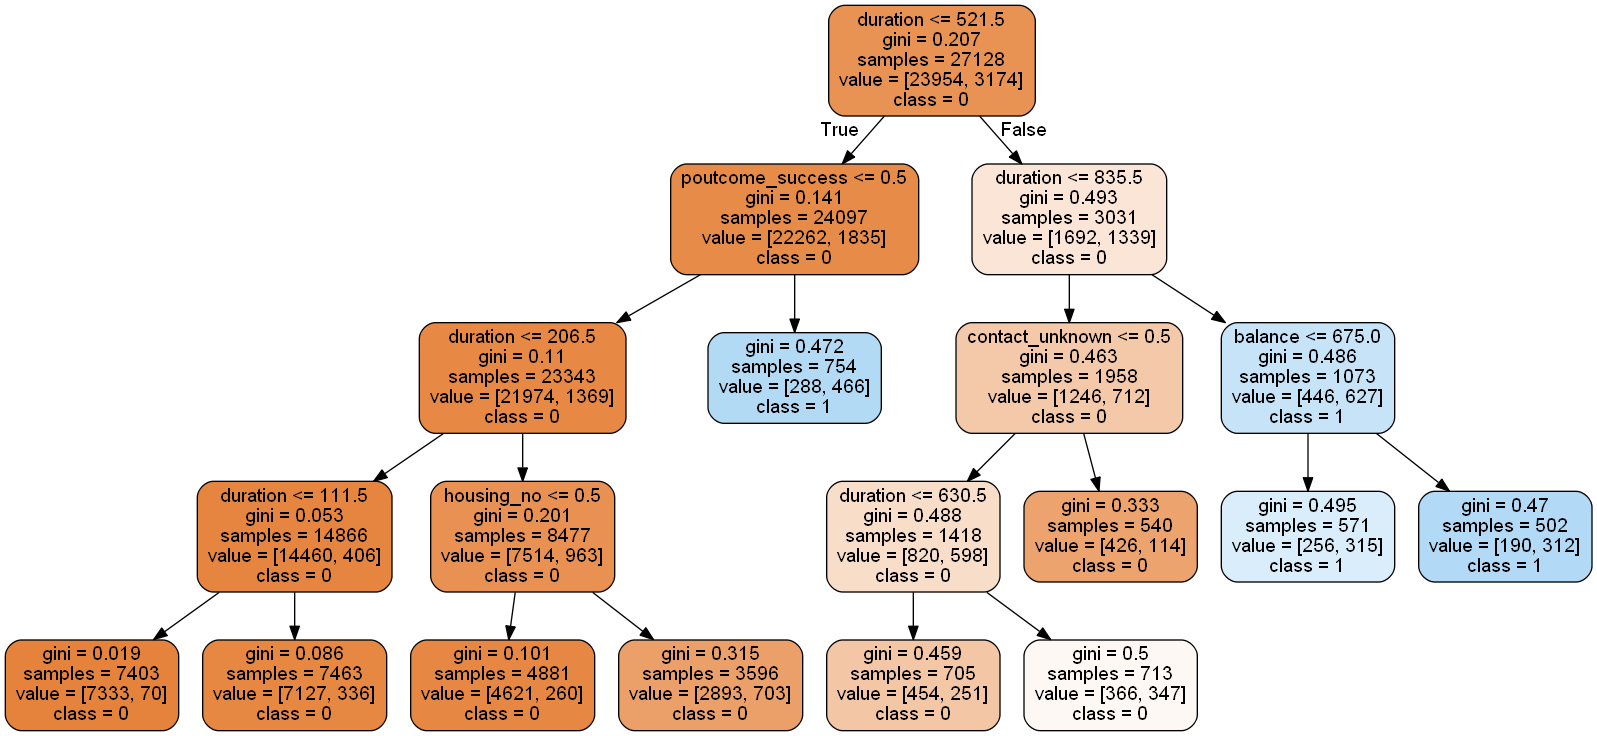

In [58]:
g = pydotplus.graph_from_dot_file(path="tree2.dot")
Image(g.create_png())

In [59]:
pred2 = clf2.predict_proba(testX)

In [60]:
pred2 = pred2[:, 1]

In [61]:
sample[1] = pred2

In [62]:
sample.to_csv('./output_csv/submit2_bank.csv', index=None, header=None)

## スコアが0.846と上昇した

In [63]:
#パラメーターをチューニングする

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [66]:
trainX = train.iloc[:, 0:17]

In [67]:
y = train['y']

In [68]:
testX = test.copy()

In [69]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [70]:
clf3 = DT(max_depth=2, min_samples_leaf=500)

In [72]:
#クロスバリデーションでclf3の精度を確かめる

cross_validate(clf3, trainX, y, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

{'fit_time': array([0.15159369, 0.1505959 , 0.14660716, 0.14959908, 0.08480644]),
 'score_time': array([0.01396441, 0.01296663, 0.0149591 , 0.01396275, 0.00798082]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162494, 0.746135  ])}

In [73]:
clf4 = DT(max_depth=10, min_samples_leaf=500)

In [74]:
cross_validate(clf4, trainX, y, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

{'fit_time': array([0.51072598, 0.50174284, 0.49077058, 0.4788022 , 0.29420447]),
 'score_time': array([0.01994061, 0.0179491 , 0.01795149, 0.02193856, 0.0219419 ]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.89239853, 0.88343681]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.8876343 , 0.885615  ])}

In [75]:
#新しい決定木の箱を作る
#スコアが上がるmax_depthを求める

clf5 = DT()

In [76]:
parameters = {'max_depth': list(range(2,11))}

In [78]:
gcv = GridSearchCV(clf5,parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
gcv.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [79]:
gcv.cv_results_

{'mean_fit_time': array([0.14039216, 0.17229857, 0.21512985, 0.25815434, 0.34063993,
        0.38463693, 0.3833909 , 0.4920495 , 0.56825337]),
 'std_fit_time': array([0.00376754, 0.0047829 , 0.00304628, 0.00986497, 0.01008062,
        0.00675612, 0.02088308, 0.05599429, 0.11109927]),
 'mean_score_time': array([0.01610589, 0.01723919, 0.01500764, 0.01527357, 0.02022467,
        0.01759081, 0.01458325, 0.01799221, 0.01717362]),
 'std_score_time': array([0.0007913 , 0.00355766, 0.00088672, 0.0008941 , 0.00358331,
        0.00119784, 0.0008312 , 0.00457138, 0.00629326]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

In [80]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

In [81]:
train_score

array([0.74831988, 0.8124462 , 0.84413528, 0.85725834, 0.86923958,
       0.88596991, 0.89891469, 0.91025688, 0.92410649])

In [82]:
test_score

array([0.74715097, 0.80745683, 0.81411275, 0.82270119, 0.82754708,
       0.82556585, 0.82162147, 0.79645439, 0.78061819])

([<matplotlib.axis.XTick at 0x2c543358130>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11')])

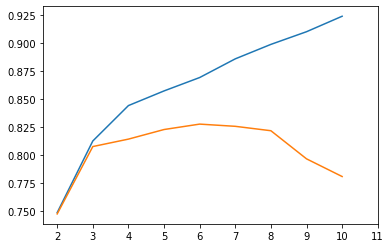

In [84]:
plt.plot(train_score)
plt.plot(test_score)

plt.xticks([0,1,2,3,4,5,6,7,8,9], [2,3,4,5,6,7,8,9,10,11])

### 6あたりが一番良さそう

In [85]:
gcv.best_params_

{'max_depth': 6}

In [86]:
pred3 = gcv.predict_proba(testX)

In [87]:
pred3 = pred3[:, 1]

In [88]:
sample[1] = pred3

In [89]:
sample.to_csv('./output_csv/submit3_bank.csv', index=None, header=None)

## 0.867とスコアが上がった　min_samples_leafも調べる

In [90]:
clf6 = DT()

In [91]:
parameters2 = {'max_depth': list(range(2,11)), 'min_samples_leaf': [5,10,20,50,100,500]}

In [92]:
gcv2 = GridSearchCV(clf6,parameters2, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
gcv2.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [93]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

In [94]:
pred4 = gcv2.predict_proba(testX)

In [95]:
pred4 = pred4[:, 1]

In [96]:
sample[1] = pred4

In [97]:
sample.to_csv('./output_csv/submit4_bank.csv', index=None, header=None)

## 0.897とスコアが上がった